In [1]:
# import data from AzureML

library("AzureML")

ws <- workspace()
dat <- download.datasets(ws, "Breast cancer data")

In [2]:
str(dat)

'data.frame':	683 obs. of  10 variables:
 $ Class      : num  0 0 0 0 0 1 0 0 0 0 ...
 $ age        : num  5 5 3 6 4 8 1 2 2 4 ...
 $ menopause  : num  1 4 1 8 1 10 1 1 1 2 ...
 $ tumor-size : num  1 4 1 8 1 10 1 2 1 1 ...
 $ inv-nodes  : num  1 5 1 1 3 8 1 1 1 1 ...
 $ node-caps  : num  2 7 2 3 2 7 2 2 2 2 ...
 $ deg-malig  : num  1 10 2 4 1 10 10 1 1 1 ...
 $ breast     : num  3 3 3 3 3 9 3 3 1 2 ...
 $ breast-quad: num  1 2 1 7 1 7 1 1 1 1 ...
 $ irradiat   : num  1 1 1 1 1 1 1 1 5 1 ...


In [3]:
head(dat)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
1,0,5,1,1,1,2,1,3,1,1
2,0,5,4,4,5,7,10,3,2,1
3,0,3,1,1,1,2,2,3,1,1
4,0,6,8,8,1,3,4,3,7,1
5,0,4,1,1,3,2,1,3,1,1
6,1,8,10,10,8,7,10,9,7,1


Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called 'corrgram'Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)
also installing the dependencies 'TSP', 'gclus', 'registry', 'seriation'




The downloaded source packages are in
	'/tmp/RtmpvH1hx8/downloaded_packages'


KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


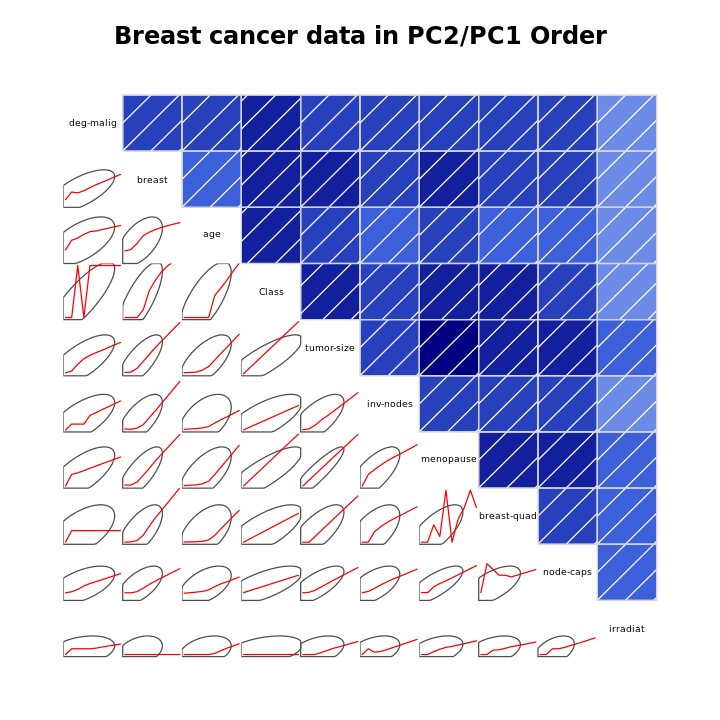

In [4]:
# install corrgram package to plot the correlation matrix

if(!require("corrgram", quietly = TRUE)) install.packages("corrgram")
library(corrgram, quietly = TRUE)
corrgram(dat, order = TRUE, 
         lower.panel = panel.ellipse,
         upper.panel = panel.shade, 
         text.panel = panel.txt,
         main = "Breast cancer data in PC2/PC1 Order",
         cex.labels = 0.7)

In [5]:
# create a binary classifier model
# separate training and test sample 

set.seed(1)
idx <- sample.int(nrow(dat), nrow(dat) * 0.8) # create an 80% sample index
train <- dat[idx, ]  # keep the 80% sample
test  <- dat[-idx, ] # discard the 80% sample

# fit the model using logistic regression
model <- glm(Class ~ ., data = dat, family = binomial)

In [6]:
summary(model)


Call:
glm(formula = Class ~ ., family = binomial, data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4841  -0.1153  -0.0619   0.0222   2.4698  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -10.10394    1.17488  -8.600  < 2e-16 ***
age             0.53501    0.14202   3.767 0.000165 ***
menopause      -0.00628    0.20908  -0.030 0.976039    
`tumor-size`    0.32271    0.23060   1.399 0.161688    
`inv-nodes`     0.33064    0.12345   2.678 0.007400 ** 
`node-caps`     0.09663    0.15659   0.617 0.537159    
`deg-malig`     0.38303    0.09384   4.082 4.47e-05 ***
breast          0.44719    0.17138   2.609 0.009073 ** 
`breast-quad`   0.21303    0.11287   1.887 0.059115 .  
irradiat        0.53484    0.32877   1.627 0.103788    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 884.35  on 682  degrees of freedom
Residual dev

In [7]:
# install ROCR package to visualize model accuracy

if(!require(ROCR, quietly = TRUE)) install.packages("ROCR")
library(ROCR, quietly = TRUE)

# create predictions using the test set data
predictions <- predict(model, test, type = "response")

# Using ROCR functions to produce a simple ROC plot:
pred <- prediction(predictions, test$Class)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")     

Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, : there is no package called 'ROCR'Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/RtmpvH1hx8/downloaded_packages'



Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



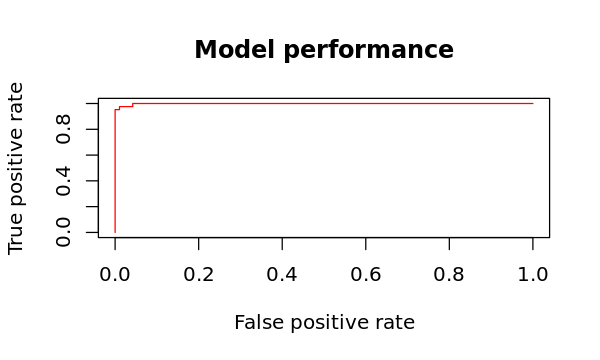

In [8]:
options(repr.plot.width = 5, repr.plot.height = 3)
plot(perf, col = rainbow(10), main = "Model performance")